### 3.2.2 Classification and regression with a two-layer perceptron

#### 3.2.2 Classification of linearly non-separable data

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def generateSubsets(n,scenario,shuffle=1, verbose=1, pattern=1):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    
    class_A=np.zeros((2,int(n)))
    class_B=np.zeros((2,int(n)))
    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_B[0]= np.random.randn(1,int(n))*sigma_B +mu_B[0]
    class_A[1]= np.random.randn(1,int(n))*sigma_A +mu_A[1]
    class_B[1]= np.random.randn(1,int(n))*sigma_B +mu_B[1]     
  
    if shuffle:
        i = np.arange(class_A.shape[1])
        np.random.shuffle(i)
        class_A=class_A[:,i] 
        print(class_A)
        print(class_A.shape)
        i = np.arange(class_B.shape[1])
        np.random.shuffle(i)
        class_B=class_B[:,i] 
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,patterns.shape[1]))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))


        if scenario == 0:
            patterns = patterns
            targets = targets
            validation_patterns = []
            validation_targets = []

        #50% of A and 100% of B
        if scenario == 1:
            validation_patterns = patterns[:,0:49]
            validation_targets = targets[0:49]
            patterns = patterns[:,50:199]
            targets = targets[50:199]

            
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i] 
        targets=targets[i]
        i_val = np.arange(validation_patterns.shape[1])
        np.random.shuffle(i_val)
        validation_patterns=validation_patterns[:,i_val] 
        validation_targets=validation_targets[i_val]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)

    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()



    if pattern:
        return patterns, targets, validation_patterns, validation_targets
    else:
        return class_A, class_B

In [112]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [113]:
def weights_init_MLP(n_out,n_in,scale,hidden):
    W = scale*np.random.randn(hidden,nPerceptron+1)
    V = scale*np.random.randn(1,hidden+1)
    #print(W.shape)
    #W = np.append(W,scale*np.random.normal())
    #W = np.hstack((W,np.random.normal()))
    #print(W.shape)
    return V,W

In [114]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

[[ 0.82962464 -1.20667894 -1.3465198  -1.07449857 -0.64386805 -1.37230552
   0.75199503  0.76532287  1.16062586 -0.79539032  1.28060566  0.84993924
   0.93004549 -1.05898325  0.77198125 -1.01309395 -1.05822197 -1.04819926
   0.91532252  1.09410777  1.21276917 -1.00138908 -1.0989117  -0.98480908
   1.20393719  1.12975677 -0.86960764 -0.78018137  1.20697423 -0.84018295
  -0.70280225  1.18076482 -1.02531929 -0.97584753  0.88451896  0.91963594
  -0.8460879   0.91512499  1.09268888 -0.91681133  0.89386222 -0.86076168
   1.04218339  0.92913187 -0.87650785 -0.86954061 -1.31793233  0.80644356
  -0.83541965 -1.39344605 -0.80283272 -1.03951456  0.74291057  1.20322688
   0.85306885  1.13427062  0.81776498 -1.00864268  0.89518977  1.04537254
  -1.09551967  1.06423729 -0.95784379  0.95488696  0.81760985  0.76521662
  -1.0238524   1.23072673  1.10116432  1.05146149 -1.04238595  1.03938377
  -1.14717238 -1.30755809 -0.98960898 -0.56013373 -1.19006582 -1.10441242
   1.01169243  0.97491183  1.08160319 

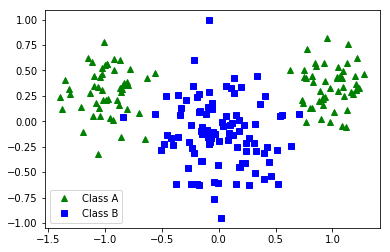

(5, 3)
(1, 6)
hej
(3, 149)
(149,)
(1001, 5, 3)
(1001, 1, 6)
shape
(3, 49)
(49,)
mse
acc


In [115]:
eta = 1e-4
nData = 100
#n_in = 
n_out = 1
nPerceptron = 3
scale = 1e-2
hidden_perceptrons = 5
epochs = 1000

#W,V = weights_init_MLP(n_out,n_in,scale,nPerceptron)
X,T,val_X,val_T = generateSubsets(nData,1,verbose=1)
W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)
print(W.shape)
print(V.shape)
print("hej")
print(X.shape)
print(T.shape)



W_train,V_train,mse,acc = backprop(eta,X,T,W,V,hidden_perceptrons,epochs)
mse_val = []
acc_val = []
W_train = np.array(W_train)
V_train = np.array(V_train)
print(W_train.shape)
print(V_train.shape)
print("shape")
print(val_X.shape)
print(val_T.shape)
for i in range(1,W_train.shape[0]):
    p = predict(val_X,W_train[i,:,:],V_train[i,:,:])
    mse_val.append(error_mse(val_T,p))
    acc_val.append(accuracy(val_T,p))
    
print("mse")
#print(mse_val)
print("acc")
#print(acc)


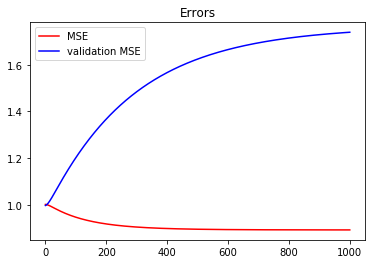

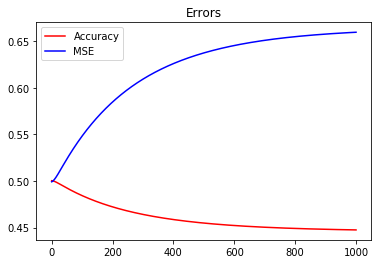

In [116]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()